# Continuous assessment, option 2: Epidemics

Since February/March 2020, we have been hugely impacted by Covid-19, the infectious disease caused by the most recently discovered coronavirus. Due to its rapid and wide spread, the WHO has declared Covid-19 as pandemic, which has caused countless deaths and distress amongst the population. Governments around the globe have had to take though decisions, many of them employing mathematical models to guide new policies. Here, we will study some of the most basic and adopted models to simulate disease progression using numerical techniques.      

---

There exist several mathematical models describing the dynamics of epidemics. From all available deterministic approaches, the SIR is regarded as the most basic yet powerful model for studying disease progression and incidence, as well as to evaluate the effect of mitigation procedures. In this assignment you will study some aspects of the SIR model and get some useful concepts needed for understanding our reality a little bit more. 

The SIR model describes the evolution of the proportion of Susceptible (S), Infected (I), and Recovered (R) individuals with the following system of initial value problems:

\begin{align}
& \frac{dS}{dt}=-\frac{\beta S I}{N},\\
& \frac{dI}{dt}=\frac{\beta S I}{N} - \gamma I,\\
& \frac{dR}{dt}=\gamma I.
\end{align}

[You can find complementary information in Wang et al., _"Statistical physics of vaccination"_ , Physics reports, 664:1-113, 2016 (freely available [here](https://www.sciencedirect.com/science/article/pii/S0370157316303349)).]

***1.*** Explain the meaning of the equations. What do $\beta$, $\gamma$, and $N$ represent? 

***Hint***: Yes, you can use the internet! **[10]**

<br />

***2.*** If $I_0$ is the initial percentage of the population infected, which are the initial conditions? **[5]**

<br />

***3.*** Solve the system of equations using the fourth order Runge - Kutta method and assuming the following parameters representing Covid-19: $\beta=0.14$  and $\gamma=14$ days. Plot the evolution of S, I, and R as a function of time for the first 300 days (assume that 1% of the population is initially infected). **[20]**

<br />


***4.*** One of the strengths of this simple but informative model is that it allows to study the effects that vaccination may have in the population. Every person that is vaccinated will move straight to the recovered group without becoming infected, which will consequently impact on the overall dynamics. If we consider that a percentage $p$ of the population is vaccinated before the start of the pandemic, explain why the initial conditions change to

<br />

$$S(t_0)=1-I_0-p,$$ 

$$I(t_0)=I_0,$$ 

$$R(t_0)=p.$$ 

<br />

Plot the number of infected individuals as a function of time considering $p=0,0.1,0.2,0.3,0.4,0.5$ (all in the same figure). Use it to justify that not all people need to be vaccinated to prevent an outbreak. This is known as _herd immunity_ . **[30]**

<br />

***5.*** The number of individuals infected at any time is given by $I(t)\times \gamma$. If 30% of the cases require hospitalisation, find the minimum value of $p$ that would allow to keep the health system not overloaded. Assume that there are hospital beds for 0.25% of the population (this figure corresponds to England in 2019). **[15]**

<br />

***6.*** The SIR model shows us that the epidemics will cease with time. However, a proportion of individuals will have contracted the disease by the time it has finished. We are interested in finding the cumulative number of people that contracted the disease as a function of time, either via vaccination or another individual. This is nothing else than

<br />

$$
\int_0^t \gamma I(\tau) d\tau.
$$

<br />

Write a callable function in Python computing this integral with the trapezium method, and use it to plot the cumulative number of infected individuals as a function of time for the values of $p$ given in the previous question. How many individuals have been infected in each case after the epidemic finished? **[20]**

**Hint**: You can check for the function ```cumsum``` available in Numpy.

# Answers

***1.*** Explain the meaning of the equations. What do $\beta$, $\gamma$, and $N$ represent? 

To answer this question we are going to do a brief review of the fundamental points of the SIR model:

The SIR model is a compartmental model because it divides the population into 3 compartments: 

* S(t): Proportion of Susceptible Individuals,healthy individuals who enter contact with the disease can become infected as a function of time

* I(t): Proportion of infected individuals, individuals who can transmit the
disease to group S (t), as a function of time.

* R(t): Proportion of retired individuals, individuals who have recovered from
disease and have become immune or have died,as a funcion of the time

SIR model assumes that the total population remains constant, that is, births and deaths that occur throughout the development of the disease are not taken into account. N represents the total population of individuals:

$N=S(t)+I(t)+R(t)$

Thus,

$\dfrac {dS}{dt}+\dfrac {dR}{dt}+\dfrac {dI}{dt}=0 $

*Note. In most bibiolgraphy books,SIR model equations are not divided by N:

\begin{align}
& \frac{dS}{dt}=-\frac{\beta S I}{1},\\
& \frac{dI}{dt}=\frac{\beta S I}{1} - \gamma I,\\
& \frac{dR}{dt}=\gamma I.
\end{align}

Division by N means that the average number of contacts per one individual is fixed and does not depend on N . This does not lead to different results qualitatively in our case, but may have important implications in more realistic models.

The infection rate is given by $\beta S (t) I (t)$ where $\beta>0$ is the per-capita rate of transmission of
the illness.It has no units,$\beta$ is an adimensional parameter.


Infected individuals will suffer from the disease for a certain period of time
until they recover and acquire immunity or die. The flow compartment of the
infected to withdrawn is determined by $\gamma I(t)$  where $\gamma> 0 $ is the withdrawal rate.


***2.***  If $I_0$ is the initial percentage of the population infected, which are the initial conditions



$$S(t_0)=1-I(t_0)-R(t_0),$$ 

$$I(t_0)=I_0,$$ 

$$R(t_0)= \dfrac {\beta}{\gamma}$$

***2.*** Solve the system of equations using the fourth order Runge - Kutta method and assuming the following parameters representing Covid-19: $\beta=0.14$  and $\gamma=14$ days. Plot the evolution of S, I, and R as a function of time for the first 300 days (assume that 1% of the population is initially infected). 

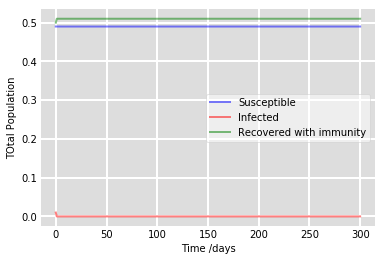

In [28]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 0.01*N, 0.5
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - 0.5
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.14, 14
# A grid of time points (in days)
t = np.linspace(0, 300, 300)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('TOtal Population') 
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()